In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Create random dataset
arr = np.array(np.random.randint(10, size=(10, 5)))
df = pd.DataFrame(arr)
df

,0,1,2,3,4
0,5,0,1,3,0
1,6,8,8,4,8
2,4,5,0,9,2
3,5,7,7,8,4
4,4,6,7,1,6
5,8,5,4,0,5
6,3,8,5,2,9
7,3,0,4,6,5
8,6,3,8,4,0
9,2,9,4,3,2


In [3]:
# Standardize dataset (transform to Z score)
# After standardized, each feature will have mean = 0 and stdev = 1

def mean(col):
    return sum(col)/len(col)

def variance(col):
    miu = mean(col); n = len(col)
    ss = 0
    for val in col:
        ss += (val - miu)**2

    return ss/n

def stdev(col):
    return np.sqrt(variance(col))

In [4]:
# Using defined function
mean_std = pd.DataFrame(dtype=np.float64)
mean_std["mean"] = df.apply(lambda x: mean(x))
mean_std["std"] = df.apply(lambda x: stdev(x))
mean_std = mean_std.T
mean_std

,0,1,2,3,4
mean,4.60000,5.10000,4.800000,4.00000,4.100000
std,1.68523,3.04795,2.638181,2.75681,2.947881


In [5]:
""" 
    x_standard = (x-label_mean)/label_stdev
"""

scaled_df = df.copy()
for i in range(scaled_df.shape[1]):
    scaled_df[i] = scaled_df[i].apply(lambda x: (x - mean_std[i][0])/mean_std[i][1])

scaled_df

,0,1,2,3,4
0,0.237356,-1.673256,-1.440386,-0.362738,-1.390830
1,0.830747,0.951459,1.212957,0.000000,1.322984
2,-0.356034,-0.032809,-1.819435,1.813691,-0.712376
3,0.237356,0.623370,0.833908,1.450953,-0.033923
4,-0.356034,0.295280,0.833908,-1.088214,0.644531
5,2.017529,-0.032809,-0.303239,-1.450953,0.305304
6,-0.949425,0.951459,0.075810,-0.725476,1.662211
7,-0.949425,-1.673256,-0.303239,0.725476,0.305304
8,0.830747,-0.688988,1.212957,0.000000,-1.390830
9,-1.542816,1.279548,-0.303239,-0.362738,-0.712376


In [6]:
# Calculate covariance matrix
def covariance(x, y):
    x_bar = mean(x)
    y_bar = mean(y)

    st = 0; n = len(x)
    for i in range(n):
        st += (x[i] - x_bar)*(y[i] - y_bar)

    return st/n

n = scaled_df.shape[1]
cov_mat = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if (i < j): 
            cov_mat[i][j] = covariance(scaled_df[i], scaled_df[j])
        elif (i == j):
            cov_mat[i][j] = variance(scaled_df[i])
        else:
            cov_mat[i][j] = cov_mat[j][i]

cov_mat

array([[ 1.        , -0.14796076,  0.2294227 , -0.23677002, -0.05233645],
       [-0.14796076,  1.        ,  0.37557309, -0.11901052,  0.48859248],
       [ 0.2294227 ,  0.37557309,  1.        , -0.21999285,  0.38832239],
       [-0.23677002, -0.11901052, -0.21999285,  1.        , -0.27071106],
       [-0.05233645,  0.48859248,  0.38832239, -0.27071106,  1.        ]])

In [7]:
# Compute eigenval and eigenvec
eigen_val, eigen_vec = np.linalg.eig(cov_mat)

# Sort descending
eigen_val = np.sort(eigen_val)[::-1]
sorted_idx = np.argsort(eigen_val)[::-1]
eigen_vec = eigen_vec[:, sorted_idx]

In [8]:
# Explained variance percentage
sum_eig = sum(eigen_val)
x = [i + 1 for i in range(len(eigen_val))]
y = [(eigen_val[i - 1]/sum_eig) for i in x]

np.array(y)

array([0.39510939, 0.25355219, 0.15736725, 0.09809263, 0.09587854])

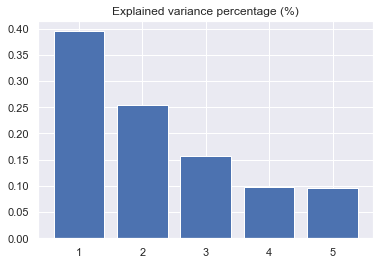

In [9]:
# Scree plot
plt.bar(x=x, height=y)
plt.title("Explained variance percentage (%)")
plt.show()

In [13]:
# Transformed dataset
# Example: take 3 highest feature
scaled_df @ eigen_vec[:, :3]

,0,1,2
0,2.243848,1.057447,-0.914077
1,-1.958244,0.183248,0.800874
2,2.072256,-1.175824,0.435823
3,-0.239016,-0.542755,1.695843
4,-1.311466,0.071866,-0.586990
5,-0.731357,2.076773,-0.645814
6,-1.626778,-1.130185,-0.987654
7,1.209002,-0.494784,-0.166546
8,0.408793,1.392622,1.048233
9,-0.067038,-1.438408,-0.679691


In [14]:
# Check with sklearn, note that data are already scaled
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_data = pd.DataFrame(scaler.transform(df))

pca = PCA(n_components=3)
df_transform = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)

[0.39510939 0.25355219 0.15736725]


In [15]:
# Transformed dataset
pd.DataFrame(pca.transform(scaled_data))

,0,1,2
0,2.243848,1.057447,-0.914077
1,-1.958244,0.183248,0.800874
2,2.072256,-1.175824,0.435823
3,-0.239016,-0.542755,1.695843
4,-1.311466,0.071866,-0.586990
5,-0.731357,2.076773,-0.645814
6,-1.626778,-1.130185,-0.987654
7,1.209002,-0.494784,-0.166546
8,0.408793,1.392622,1.048233
9,-0.067038,-1.438408,-0.679691
